<img src="https://github.com/LucaScaldaferri/Curso_Cientista_de_Dados/blob/main/logo_ebac.png?raw=true" alt="ebac-logo">


---

# **Profissão Cientista de Dados**
## **Módulo** 9 | TdD III - Agregações e operações em grupos | Exercício 2
Resolução Caderno de **Exercícios**<br> 
Aluno [Lucas Scaldaferri Magalhães Freitas](https://www.linkedin.com/in/0scaldaferri-lucas/) <br>

---

# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [5]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [45]:
sinasc_1 = sinasc_raw.copy()
munResLat = pd.cut(sinasc_1['munResLat'], [sinasc_1.munResLat.min(), -10.5, sinasc_1.munResLat.max()])
sinasc_1[['munResAlt', 'munResLon']].groupby(munResLat).agg([sum, 'mean', min, max, 'median', 'std', np.var])

munResAlt                                               \
                       sum        mean    min    max median         std   
munResLat                                                                 
(-13.5, -10.5]   3291565.0  254.903198  133.0  595.0  191.0  140.196000   
(-10.5, -8.769]  1530415.0  109.050520   85.0  192.0   87.0   30.071422   

                                  munResLon                                 \
                          var           sum       mean       min       max   
munResLat                                                                    
(-13.5, -10.5]   19654.918293 -799413.46543 -61.907649 -65.32395 -60.13858   
(-10.5, -8.769]    904.290400 -891822.01897 -63.547244 -65.32915 -61.99959   

                                               
                   median       std       var  
munResLat                                      
(-13.5, -10.5]  -61.90944  1.230650  1.514499  
(-10.5, -8.769] -63.83145  0.627696  0.394002

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [60]:
sinasc_2 = sinasc_raw.copy()
munResArea = pd.cut(sinasc_2['munResArea'], [sinasc_2.munResArea.min(), 3000, sinasc_2.munResArea.max()])
sinasc_2[['IDANOMAL', 'QTDGESTANT']].groupby(munResArea).agg([sum, 'mean', min, max, 'median', 'std', np.var])

IDANOMAL                                                 \
                         sum      mean  min  max median       std       var   
munResArea                                                                    
(459.978, 3000.0]    10334.0  2.013248  1.0  9.0    2.0  0.387625  0.150253   
(3000.0, 34096.394]  43204.0  2.034182  1.0  9.0    2.0  0.552080  0.304793   

                    QTDGESTANT                                                  
                           sum      mean  min   max median       std       var  
munResArea                                                                      
(459.978, 3000.0]       5804.0  1.135590  0.0   9.0    1.0  1.209635  1.463216  
(3000.0, 34096.394]    27046.0  1.310368  0.0  52.0    1.0  1.447429  2.095052

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [58]:
sinasc_3['munResAlt'].median()

153.0

In [61]:
sinasc_3 = sinasc_raw.copy()
munResAlt = pd.cut(sinasc_3['munResAlt'], [sinasc_3.munResAlt.min(), 153, sinasc_3.munResAlt.max()])
sinasc_3[['SEMAGESTAC', 'QTDPARTNOR']].groupby(munResAlt).agg([sum, 'mean', min, max, 'median', 'std', np.var])

SEMAGESTAC                                                    \
                      sum       mean   min   max median       std       var   
munResAlt                                                                     
(85.0, 153.0]    481249.0  38.561619  21.0  45.0   39.0  2.097140  4.397998   
(153.0, 595.0]   501090.0  38.566151  19.0  45.0   39.0  1.938267  3.756881   

               QTDPARTNOR                                                  
                      sum      mean  min   max median       std       var  
munResAlt                                                                  
(85.0, 153.0]      8999.0  0.773974  0.0  40.0    0.0  1.357675  1.843283  
(153.0, 595.0]     5264.0  0.398064  0.0  41.0    0.0  1.018270  1.036874

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

<Axes: xlabel='DTNASC'>

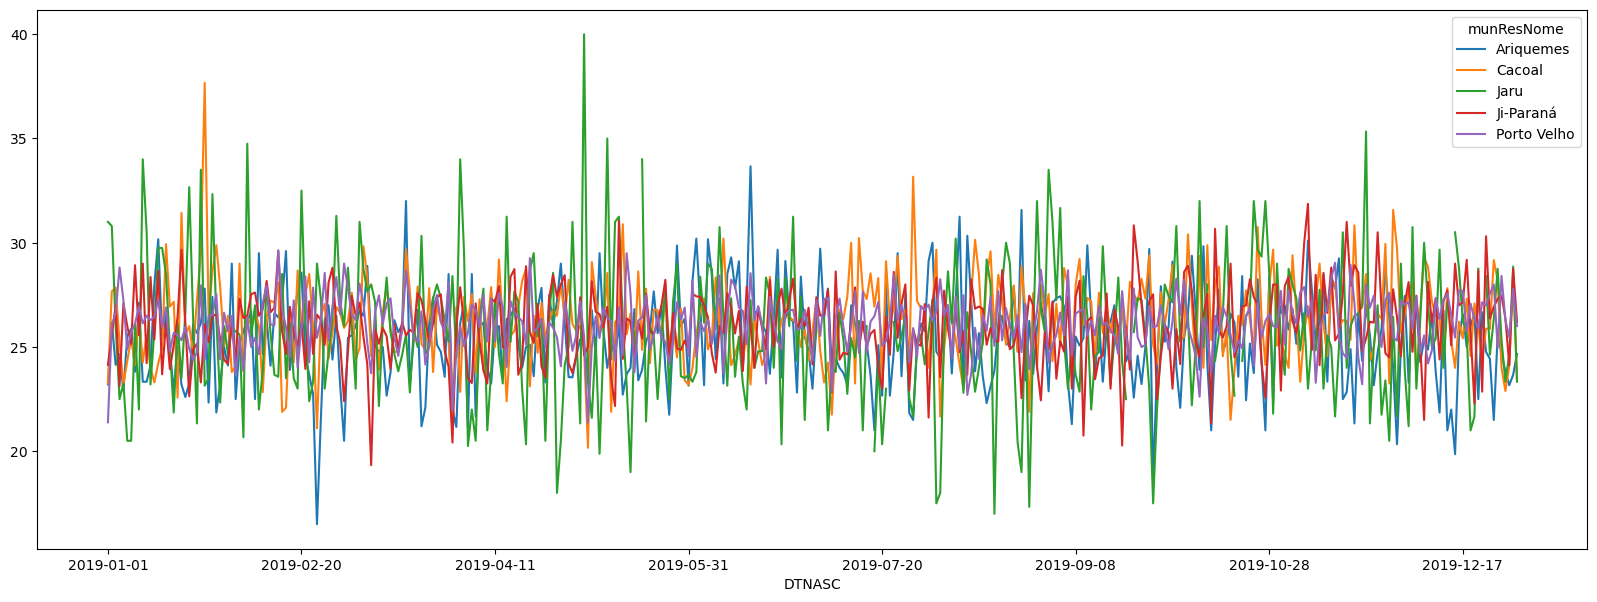

In [267]:
imediata = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    
    "Alto Paraíso": "Ariquemes",
    "Ariquemes": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
            }


sinasc_4 = sinasc_raw[['munResNome', 'DTNASC', 'IDADEMAE']]
sinasc_4 = sinasc_4.set_index('munResNome')
sinasc_4 = pd.pivot_table(index='DTNASC', columns=[imediata], values='IDADEMAE', aggfunc='mean', data=sinasc_4)
sinasc_4.plot(figsize=(20,7))

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [255]:
idh = {
    "Porto Velho": "IDH-M alto",
    "Vilhena": "IDH-M alto",
    "Cacoal": "IDH-M alto",
    "Ji-Paraná": "IDH-M alto",
    "Pimenta Bueno": "IDH-M alto",
    "Ariquemes": "IDH-M alto",
    "Rolim de Moura": "IDH-M alto",
    
    "Cerejeiras": "IDH-M médio",
    "Jaru": "IDH-M médio",
    "Colorado do Oeste": "IDH-M médio",
    "Ouro Preto do Oeste": "IDH-M médio",
    "Espigão D'Oeste": "IDH-M médio",
    "Santa Luzia D'Oeste": "IDH-M médio",
    "Pimenteiras do Oeste": "IDH-M médio",
    "Presidente Médici": "IDH-M médio",
    "Castanheiras": "IDH-M médio",
    "Guajará-Mirim": "IDH-M médio",
    "Chupinguaia": "IDH-M médio",
    "Cabixi": "IDH-M médio",
    "Candeias do Jamari":  "IDH-M médio",
    "São Felipe D'Oeste": "IDH-M médio",
    "Cacaulândia": "IDH-M médio",
    "São Miguel do Guaporé": "IDH-M médio",
    "Mirante da Serra": "IDH-M médio",
    "Alvorada D'Oeste": "IDH-M médio",
    "Teixeirópolis": "IDH-M médio",
    "Nova Brasilândia D'Oeste": "IDH-M médio",
    "Rio Crespo": "IDH-M médio",
    "Primavera de Rondônia": "IDH-M médio",
    "Alta Floresta D'Oeste": "IDH-M médio",
    "Ministro Andreazza": "IDH-M médio",
    "Novo Horizonte do Oeste": "IDH-M médio",
    "Vale do Paraíso": "IDH-M médio",
    "Alto Paraíso": "IDH-M médio",
    "Parecis": "IDH-M médio",
    "Buritis": "IDH-M médio",
    "Itapuã do Oeste": "IDH-M médio",
    "Corumbiara": "IDH-M médio",
    "Cujubim": "IDH-M médio",
    "Costa Marques": "IDH-M médio",
    "São Francisco do Guaporé": "IDH-M médio",
    "Urupá": "IDH-M médio",
    "Monte Negro": "IDH-M médio",
    
    "Seringueiras": "IDH-M baixo",
    "Governador Jorge Teixeira": "IDH-M baixo",
    "Machadinho D'Oeste": "IDH-M baixo",
    "Campo Novo de Rondônia": "IDH-M baixo",
    "Alto Alegre dos Parecis": "IDH-M baixo",
    "Theobroma": "IDH-M baixo",
    "Nova União": "IDH-M baixo",
    "Nova Mamoré": "IDH-M baixo",
    "Vale do Anari": "IDH-M baixo"
    }

sinasc_5 = sinasc_raw
sinasc_5 = sinasc_5.set_index('munResNome')
sinasc_5 = sinasc_5[['IDADEMAE']].groupby(idh).agg(['count', 'min', 'max', 'median'])
sinasc_5

IDADEMAE               
               count min max median
munResNome                         
IDH-M alto     16855  12  47   26.0
IDH-M baixo     1826  13  46   25.0
IDH-M médio     8346  11  53   25.0

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [254]:
ifdm = {
    "Ariquemes": "IFDM Desenvolvimento moderado",
    "Vilhena": "IFDM Desenvolvimento moderado",
    "Pimenta Bueno": "IFDM Desenvolvimento moderado",
    "Porto Velho": "IFDM Desenvolvimento moderado",
    "Ji-Paraná": "IFDM Desenvolvimento moderado",
    "Cacoal": "IFDM Desenvolvimento moderado",
    "Santa Luzia D'Oeste": "IFDM Desenvolvimento moderado",
    "Rolim de Moura": "IFDM Desenvolvimento moderado",
    "Chupinguaia": "IFDM Desenvolvimento moderado",
    "São Miguel do Guaporé": "IFDM Desenvolvimento moderado",
    "Pimenteiras do Oeste": "IFDM Desenvolvimento moderado",
    "Teixeirópolis": "IFDM Desenvolvimento moderado",
    "Colorado do Oeste": "IFDM Desenvolvimento moderado",
    "Jaru": "IFDM Desenvolvimento moderado",
    "Rio Crespo": "IFDM Desenvolvimento moderado",
    "Primavera de Rondônia": "IFDM Desenvolvimento moderado",
    "Alta Floresta D'Oeste": "IFDM Desenvolvimento moderado",
    "Ouro Preto do Oeste": "IFDM Desenvolvimento moderado",
    "São Francisco do Guaporé": "IFDM Desenvolvimento moderado",
    "Candeias do Jamari": "IFDM Desenvolvimento moderado",
    "Buritis": "IFDM Desenvolvimento moderado",
    "São Felipe D'Oeste": "IFDM Desenvolvimento moderado",
    "Presidente Médici": "IFDM Desenvolvimento moderado",
    "Cerejeiras": "IFDM Desenvolvimento moderado",
    "Monte Negro": "IFDM Desenvolvimento moderado",
    "Urupá": "IFDM Desenvolvimento moderado",
        
    "Espigão D'Oeste": "IFDM Desenvolvimento regular",
    "Seringueiras": "IFDM Desenvolvimento regular",
    "Alvorada D'Oeste": "IFDM Desenvolvimento regular",
    "Itapuã do Oeste": "IFDM Desenvolvimento regular",
    "Cabixi": "IFDM Desenvolvimento regular",
    "Novo Horizonte do Oeste": "IFDM Desenvolvimento regular",
    "Nova Brasilândia D'Oeste": "IFDM Desenvolvimento regular",
    "Vale do Paraíso": "IFDM Desenvolvimento regular",
    "Corumbiara": "IFDM Desenvolvimento regular",
    "Alto Paraíso": "IFDM Desenvolvimento regular",
    "Cacaulândia": "IFDM Desenvolvimento regular",
    "Vale do Anari": "IFDM Desenvolvimento regular",
    "Ministro Andreazza": "IFDM Desenvolvimento regular",
    "Costa Marques": "IFDM Desenvolvimento regular",
    "Nova União": "IFDM Desenvolvimento regular",
    "Guajará-Mirim": "IFDM Desenvolvimento regular",
    "Mirante da Serra": "IFDM Desenvolvimento regular",
    "Parecis": "IFDM Desenvolvimento regular",
    "Castanheiras": "IFDM Desenvolvimento regular",
    "Theobroma": "IFDM Desenvolvimento regular",
    "Machadinho D'Oeste": "IFDM Desenvolvimento regular",
    "Campo Novo de Rondônia": "IFDM Desenvolvimento regular",
    "Nova Mamoré": "IFDM Desenvolvimento regular",
    "Cujubim": "IFDM Desenvolvimento regular",
    "Alto Alegre dos Parecis": "IFDM Desenvolvimento regular",
    "Governador Jorge Teixeira": "IFDM Desenvolvimento regular",
        }

sinasc_5_2 = sinasc_raw
sinasc_5_2 = sinasc_5_2.set_index('munResNome')
sinasc_5_2 = sinasc_5_2[['IDADEMAE']].groupby(ifdm).agg(['count', 'min', 'max', 'median'])
sinasc_5_2

IDADEMAE               
                                 count min max median
munResNome                                           
IFDM Desenvolvimento moderado    21946  12  53   26.0
IFDM Desenvolvimento regular      5081  11  52   25.0

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [252]:
pib = {
    "Porto Velho": "PIB Acima de 1 Bilhão",
    "Ji-Paraná": "PIB Acima de 1 Bilhão",
    "Vilhena": "PIB Acima de 1 Bilhão",
    "Ariquemes": "PIB Acima de 1 Bilhão",
    "Cacoal": "PIB Acima de 1 Bilhão",
    "Jaru": "PIB Acima de 1 Bilhão",
    "Rolim de Moura": "PIB Acima de 1 Bilhão",
    "Pimenta Bueno": "PIB Acima de 1 Bilhão",

    "Guajará-Mirim": "PIB Acima de 500 Milhões",
    "Ouro Preto do Oeste": "PIB Acima de 500 Milhões",
    "Buritis": "PIB Acima de 500 Milhões",
    "Machadinho D'Oeste": "PIB Acima de 500 Milhões",
    "Espigão D'Oeste": "PIB Acima de 500 Milhões",
    "São Miguel do Guaporé": "PIB Acima de 500 Milhões",
    "Candeias do Jamari": "PIB Acima de 500 Milhões",
    "Nova Mamoré": "PIB Acima de 500 Milhões",
    "Cerejeiras": "PIB Acima de 500 Milhões",

    "Alta Floresta D'Oeste": "PIB Acima de 300 Milhões",
    "Presidente Médici": "PIB Acima de 300 Milhões",
    "Cujubim": "PIB Acima de 300 Milhões",
    "Nova Brasilândia D'Oeste": "PIB Acima de 300 Milhões",
    "Alto Paraíso": "PIB Acima de 300 Milhões",
    "São Francisco do Guaporé": "PIB Acima de 300 Milhões",
    "Colorado do Oeste": "PIB Acima de 300 Milhões",

    "Monte Negro": "PIB Acima de 200 Milhões",
    "Alto Alegre dos Parecis": "PIB Acima de 200 Milhões",
    "Campo Novo de Rondônia": "PIB Acima de 200 Milhões",
    "Alvorada D'Oeste": "PIB Acima de 200 Milhões",

    "Chupinguaia": "PIB Acima de 100 Milhões",
    "Corumbiara": "PIB Acima de 100 Milhões",
    "Ministro Andreazza": "PIB Acima de 100 Milhões",
    "Urupá": "PIB Acima de 100 Milhões",
    "Costa Marques": "PIB Acima de 100 Milhões",
    "Seringueiras": "PIB Acima de 100 Milhões",
    "Mirante da Serra": "PIB Acima de 100 Milhões",
    "Governador Jorge Teixeira": "PIB Acima de 100 Milhões",
    "Theobroma": "PIB Acima de 100 Milhões",
    "Santa Luzia D'Oeste": "PIB Acima de 100 Milhões",
    "Novo Horizonte do Oeste": "PIB Acima de 100 Milhões",
    "Itapuã do Oeste": "PIB Acima de 100 Milhões",
    "Vale do Paraíso": "PIB Acima de 100 Milhões",
    "Cacaulândia": "PIB Acima de 100 Milhões",
    "Cabixi": "PIB Acima de 100 Milhões",
    "Vale do Anari": "PIB Acima de 100 Milhões",

    "Nova União": "PIB Até 100 Milhões",
    "Parecis": "PIB Até 100 Milhões",
    "Rio Crespo": "PIB Até 100 Milhões",
    "Pimenteiras do Oeste": "PIB Até 100 Milhões",
    "Teixeirópolis": "PIB Até 100 Milhões",
    "São Felipe D'Oeste": "PIB Até 100 Milhões",
    "Castanheiras": "PIB Até 100 Milhões",
    "Primavera de Rondônia": "PIB Até 100 Milhões",
        }

sinasc_5_3 = sinasc_raw
sinasc_5_3 = sinasc_5_3.set_index('munResNome')
sinasc_5_3 = sinasc_5_3[['IDADEMAE']].groupby(pib).agg(['count', 'min', 'max', 'median'])
sinasc_5_3

IDADEMAE               
                            count min max median
munResNome                                      
PIB Acima de 1 Bilhão       17736  12  47   26.0
PIB Acima de 100 Milhões     1952  12  52   25.0
PIB Acima de 200 Milhões      724  13  44   25.0
PIB Acima de 300 Milhões     1880  11  53   25.0
PIB Acima de 500 Milhões     4304  13  53   25.0
PIB Até 100 Milhões           431  14  41   26.0

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

1 -  Latitude, longitude, altitude e área do município, não apresentam influência na saúde dos bebês.

2 - A mediana da idade das mães é de no mínimo 25 e no máximo 26 anos, quando classificadas pelo PIB.

3 - Embora há muito mais mães classificadas com índice de desenvolvimento moderado, quase não há diferença nos dados para mães classificadas em índice de desenvolvimento regular.

4 - A maior parte das mães estão classificadas como IDH-M alto